<a href="https://colab.research.google.com/github/Rajvid22/Dissertation/blob/main/Cyber_Threat_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Author: 

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import plotly.figure_factory as ff
from plotly import graph_objs as go
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots

import re
import string


import unicodedata

from collections import Counter

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Loading Dataset

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Msc Dissertation/Twitter_Data.csv")

In [4]:
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


0 Indicating it is a Neutral Tweet/Comment

1 Indicating a Postive Sentiment

-1 Indicating a Negative Tweet/Comment

### Basic Info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


Total 162K samples are there. Null/Missing value exists.

### Checking for Null/NaN values

In [6]:
df.isna().sum()

clean_text    4
category      7
dtype: int64

### Dropping Null/NaN values

In [7]:
df.dropna(inplace=True)

In [8]:
df.isna().sum()

clean_text    0
category      0
dtype: int64

### Basic Stats

In [9]:
df.describe()

,category
count,162969.000000
mean,0.225442
std,0.781279
min,-1.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


###Distribution of Category

In [10]:
temp = df.groupby("category").count()["clean_text"].reset_index().sort_values(by = "clean_text", ascending = False)

temp.style.background_gradient(cmap='Purples')

,category,clean_text
2,1.000000,72249
1,0.000000,55211
0,-1.000000,35509


In [11]:
px.histogram(df, x = "category", color = "category").update_xaxes(categoryorder="total descending")

Data is not quite balanced with all the classes. Category 0 and 1 has more samples compared to category -1

### Funnel Chart for Better Visualization

In [12]:
fig = go.Figure(go.Funnelarea(
    text =  temp["category"],
    values = temp["clean_text"], 
    title = {"position": "top center", "text": "Funnel-Chart of Category Distribution"}
))

fig.show()

### Let's look at the distribution of length of each Description

In [13]:
df["Length of Description"] = df["clean_text"].apply(lambda x: len(x.split()))

In [14]:
px.histogram(df, x = df["Length of Description"])

Looks like the lenghts are normally distributed

In [15]:
px.histogram(x = df[df["category"] == 0]["Length of Description"], title = "Number of words in Category 0")

In [16]:
px.histogram(x = df[df["category"] == 1]["Length of Description"], title = "Number of words in Category 1")

In [17]:
px.histogram(x = df[df["category"] == -1]["Length of Description"], title = "Number of words in Category -1")

### Stats for Length of Description

In [18]:
df["Length of Description"].describe()

count    162969.000000
mean         20.080702
std          10.879596
min           0.000000
25%          11.000000
50%          18.000000
75%          29.000000
max          52.000000
Name: Length of Description, dtype: float64

### Average number of words in description of each Category

In [19]:
print("The average number of words in description of Category 0 is", int(df[df["category"] == 0]["Length of Description"].mean()))

print("The average number of words in description of  Category 1 is", int(df[df["category"] == 1]["Length of Description"].mean()))

print("The average number of words in description of  Category -1 is", int(df[df["category"] == -1]["Length of Description"].mean()))

The average number of words in description of Category 0 is 14
The average number of words in description of  Category 1 is 22
The average number of words in description of  Category -1 is 23


### Distribution of words using KDE plot


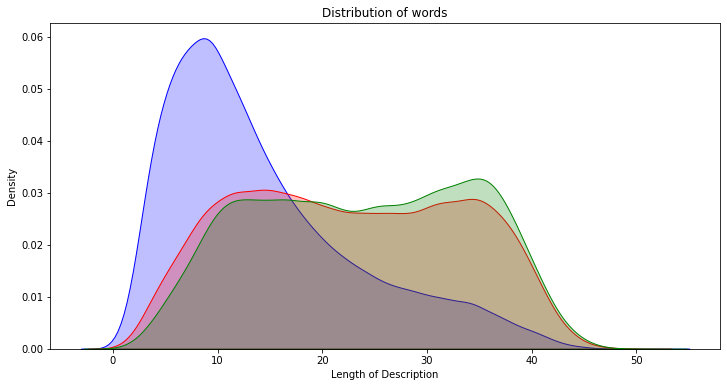

In [20]:
plt.figure(figsize=(12,6))
p1 = sns.kdeplot(df[df['category'] == 0]['Length of Description'], shade=True, color="b").set_title('Distribution of words')
p2 = sns.kdeplot(df[df['category'] == 1]['Length of Description'], shade=True, color="r")
p3 = sns.kdeplot(df[df['category'] == -1]['Length of Description'], shade=True, color="g")

### Box Plot

In [21]:
px.box(df, y="Length of Description")

### Cleaning Text

In [22]:
def clean_text(text):

    text = re.sub("\s+", " ", text) # Remove extra spaces

    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # Remove punctuation 

    #text = re.sub('\w*\d\w*', '', text) # Remove words containing numbers

    text = unicodedata.normalize(u'NFKD', text).encode('ascii', 'ignore').decode('utf8') # Unicode the text

    return text

In [23]:
df["Cleaned"] = df["clean_text"].apply(lambda x: clean_text(x))

### Function to display most common words

In [24]:
dummy = pd.DataFrame()

dummy['temp_list'] = df["Cleaned"].apply(lambda x:str(x).split())

top = Counter([item for sublist in dummy['temp_list'] for item in sublist])

temp = pd.DataFrame(top.most_common(20))

temp.columns = ['Common_words','count']

temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,modi,155513
1,the,104474
2,and,67341
3,for,52420
4,you,38973
5,not,29343
6,india,29138
7,will,28931
8,this,28600
9,that,28188


In [25]:
fig = px.bar(temp, x = "count", y = "Common_words", title='Commmon Words in Description', orientation='h', 
             width=700, height=700, color='Common_words')
fig.show()

### Tree map

In [26]:
fig = px.treemap(temp, path=['Common_words'], values='count',title='Tree of Most Common Words')
fig.show()

### Removing Stopwords

In [27]:
def remove_stopwords(text):

    text = " ".join([word for word in text.split() if word.lower() not in stopwords.words('english')])

    return text

In [28]:
df["Cleaned"] = df["Cleaned"].apply(lambda x: remove_stopwords(x))

### Most common words after remove Stopwords


In [29]:
dummy['temp_list1'] = df["Cleaned"].apply(lambda x:str(x).split())

top = Counter([item for sublist in dummy['temp_list1'] for item in sublist])

temp = pd.DataFrame(top.most_common(20))

temp.columns = ['Common_words','count']

temp.style.background_gradient(cmap='hot_r')

,Common_words,count
0,modi,155513
1,india,29138
2,bjp,14643
3,people,13894
4,congress,12827
5,like,12578
6,narendra,11459
7,govt,10023
8,vote,9303
9,one,9297


In [30]:
fig = px.bar(temp, x = "count", y = "Common_words", title='Commmon Words in Description after removing stop words', orientation='h', 
             width=700, height=700, color='Common_words')
fig.show()

In [31]:
fig = px.treemap(temp, path=['Common_words'], values='count',title='Tree of Most Common Words after removing stop words')
fig.show()

### Lets count the number of words in description after removing the Stopwords

In [32]:
df["Length of Description without Stopwords"] = df["Cleaned"].apply(lambda x: len(x.split()))

In [33]:
px.histogram(df, x = df["Length of Description without Stopwords"])

In [34]:
px.histogram(x = df[df["category"] == 0]["Length of Description without Stopwords"], title = "Number of words in type Deliverable after removing stop words")


In [35]:
px.histogram(x = df[df["category"] == 1]["Length of Description without Stopwords"], title = "Number of words in type Deliverable after removing stop words")


In [36]:
px.histogram(x = df[df["category"] == -1]["Length of Description without Stopwords"], title = "Number of words in type Deliverable after removing stop words")


### Box Plot after removing Stopwords

In [37]:
px.box(df, y="Length of Description without Stopwords")

### Calculating Averages

In [38]:
print("The average number of words in description of Category 0 after removing stop words is", int(df[df["category"] == 0]["Length of Description without Stopwords"].mean()))

print("The average number of words in description of  Category 1 stop words is", int(df[df["category"] == 1]["Length of Description without Stopwords"].mean()))

print("The average number of words in description of  Category -1 Deliverable stop words is", int(df[df["category"] == -1]["Length of Description without Stopwords"].mean()))

The average number of words in description of Category 0 after removing stop words is 10
The average number of words in description of  Category 1 stop words is 16
The average number of words in description of  Category -1 Deliverable stop words is 16


In [39]:
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), color = 'white',
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'u', "im"}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color=color,
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=400, 
                    height=200,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  

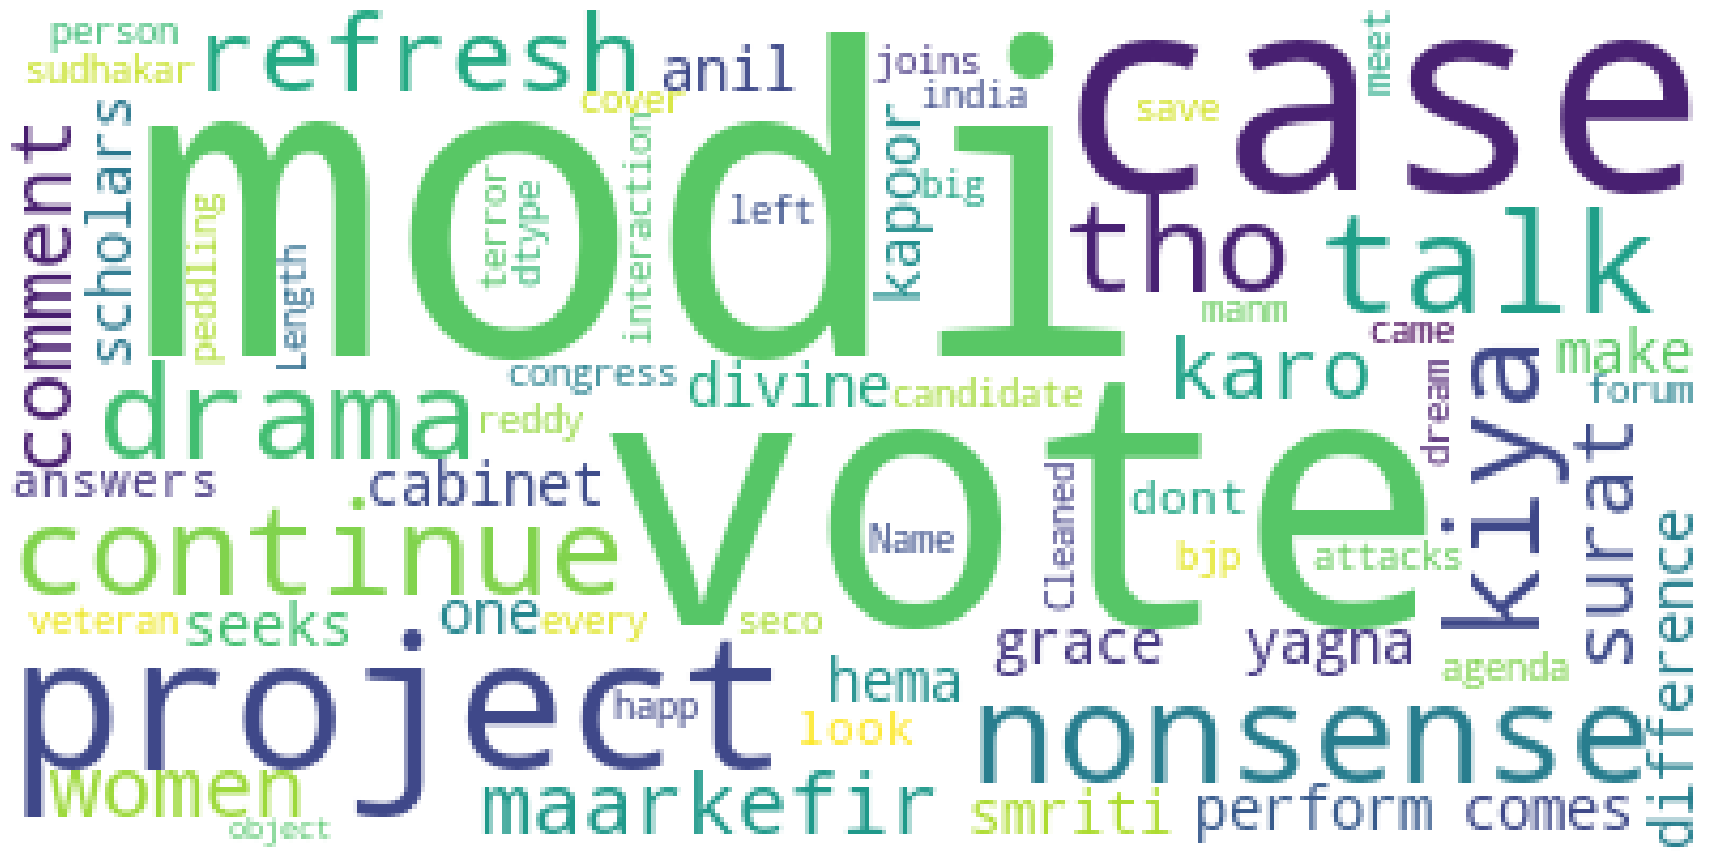

In [40]:
plot_wordcloud(df[df["category"] == 0]["Cleaned"])

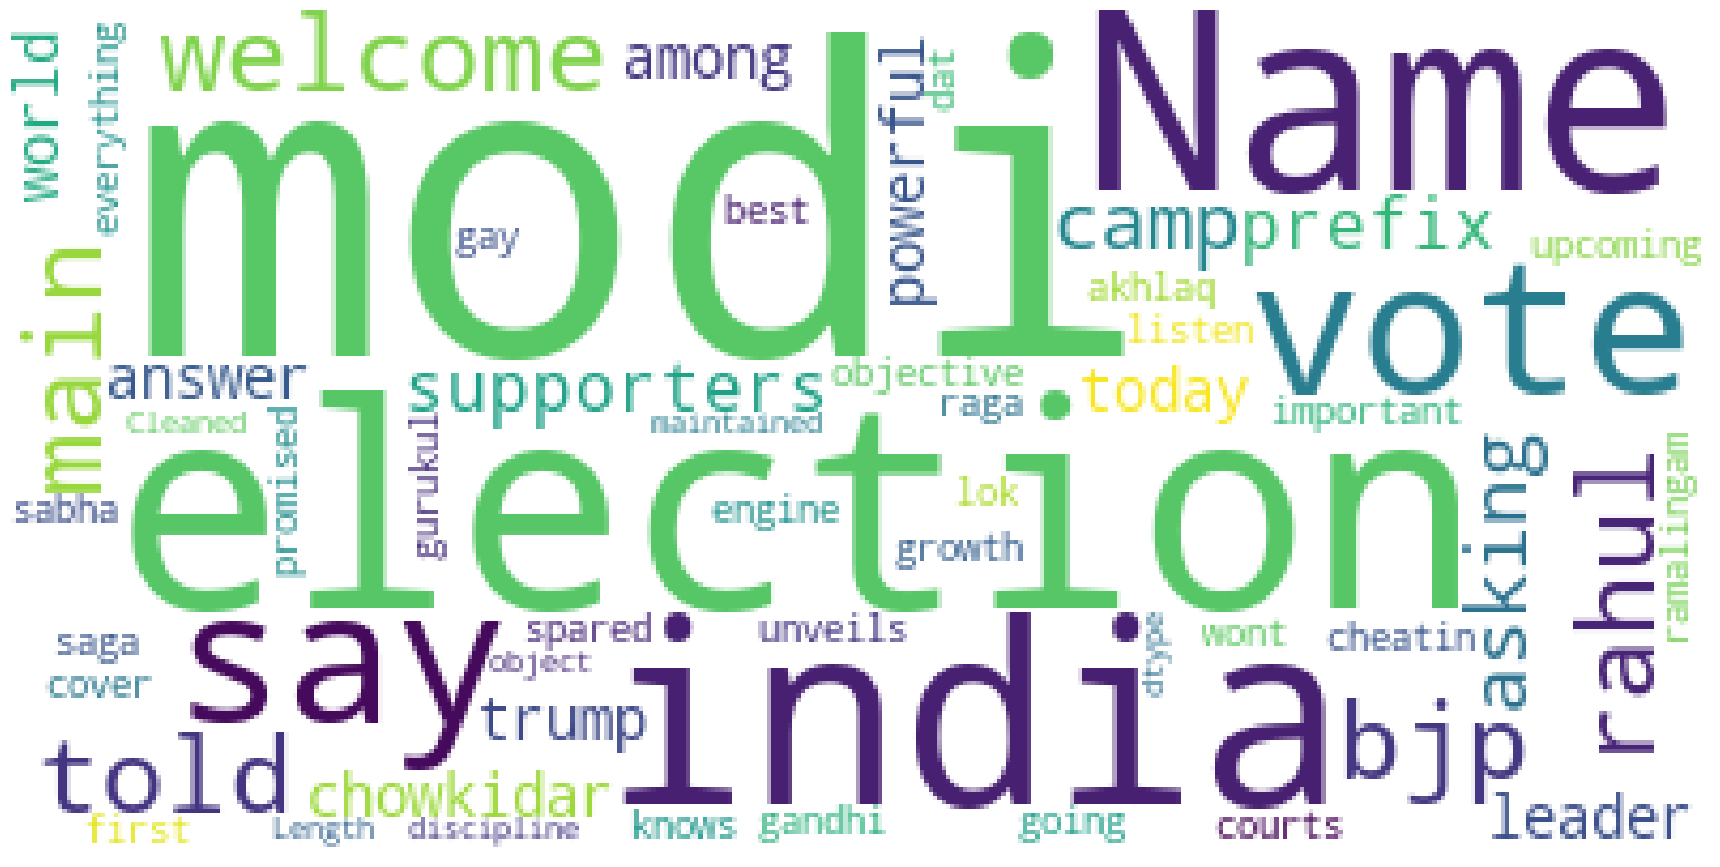

In [41]:
plot_wordcloud(df[df["category"] == 1]["Cleaned"])

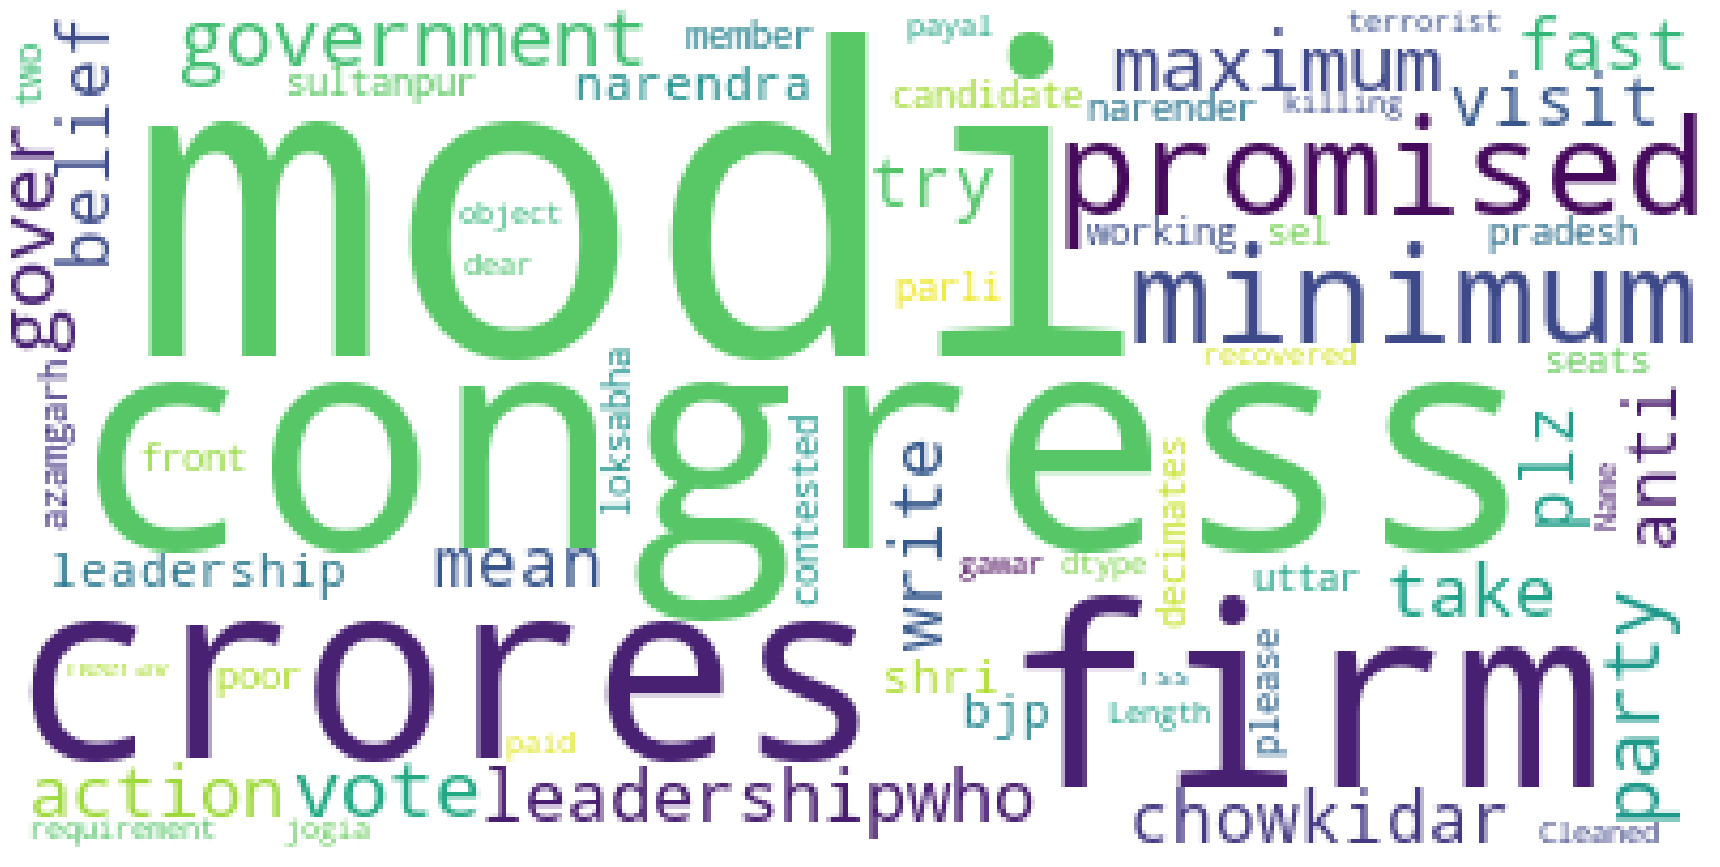

In [42]:
plot_wordcloud(df[df["category"] == -1]["Cleaned"])